In [1]:
import pandas as pd

In [17]:
loss_train = pd.read_csv("/root/zengzihui/ISST/ISST_Baselines/mTAN/src/swat@06-01T21:24:48_loss_train.csv", index_col=0, names = ["loss_train"])
loss_val = pd.read_csv("/root/zengzihui/ISST/ISST_Baselines/mTAN/src/swat_beta_3@06-01T21:24:51_loss_val.csv", index_col=0, names = ["loss_val"])

In [18]:
loss_val

loss_val
NaN     0.000000
0.0     4.145937
1.0     4.200872
2.0     4.225401
3.0     4.186361
...          ...
9871.0  4.593034
9872.0  4.444834
9873.0  4.473026
9874.0  4.427533
9875.0  4.390415

[9877 rows x 1 columns]

In [19]:
loss_test = pd.read_csv("/root/zengzihui/ISST/ISST_Baselines/mTAN/src/swat@06-01T21:34:47_loss_test.csv", index_col=0, names=["test_loss"])
label_test = pd.read_csv("/root/zengzihui/ISST/ISST_Baselines/mTAN/src/swat@06-01T21:34:47_label_test.csv", index_col=0, names = ["test_label"])

In [20]:
loss_val.boxplot()

<AxesSubplot:>

<AxesSubplot:>

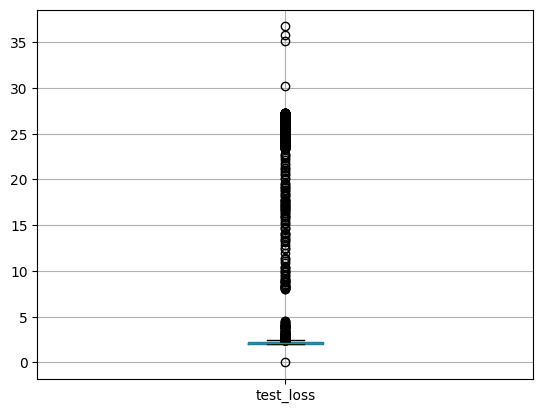

In [21]:
loss_test.boxplot()

In [24]:
df = pd.concat([loss_test, label_test], axis=1)

In [32]:
df = df[1:]

In [33]:
df

test_loss  test_label
1.0       2.044257           0
2.0       2.044097           0
3.0       2.044157           0
4.0       2.044234           0
5.0       2.044335           0
...            ...         ...
44879.0   2.273564           0
44880.0   2.273478           0
44881.0   2.274475           0
44882.0   2.273973           0
44883.0   2.273789           0

[44883 rows x 2 columns]

In [37]:
import plotly.express as px

fig = px.box(df,x = "test_loss", color="test_label")
# fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.show()

In [52]:
import plotly.express as px

fig = px.box(df,x = "test_loss", color="predict")
# fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.show()

In [40]:
thr = pd.read_csv("/root/zengzihui/ISST/ISST_Baselines/mTAN/src/swat@06-01T21:34:47_thresh_old.csv", index_col = 0, names = ["thr"], header = None)

In [46]:
thr_val = 2.790559

In [50]:
df["predict"] = df["test_loss"].map(lambda x: 1 if x > thr_val else 0)

/tmp/ipykernel_61023/2460903024.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [51]:
df

test_loss  test_label  predict
1.0       2.044257           0        0
2.0       2.044097           0        0
3.0       2.044157           0        0
4.0       2.044234           0        0
5.0       2.044335           0        0
...            ...         ...      ...
44879.0   2.273564           0        0
44880.0   2.273478           0        0
44881.0   2.274475           0        0
44882.0   2.273973           0        0
44883.0   2.273789           0        0

[44883 rows x 3 columns]

In [56]:
import plotly.express as px
# df = px.data.iris() # iris is a pandas DataFrame
df["predict"] = df["predict"].map(lambda x: str(x))
fig = px.scatter(df, x=df.index, y="test_loss", color = "predict")
fig.show()

/tmp/ipykernel_61023/2104866170.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [57]:
import plotly.express as px
# df = px.data.iris() # iris is a pandas DataFrame
df["test_label"] = df["test_label"].map(lambda x: str(x))
fig = px.scatter(df, x=df.index, y="test_loss", color = "test_label")
fig.show()

/tmp/ipykernel_61023/3530802215.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

